In [ ]:
import pandas as pd

train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.shape


(614, 13)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


missing values


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [ ]:
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [ ]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [ ]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [ ]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [ ]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


EDA

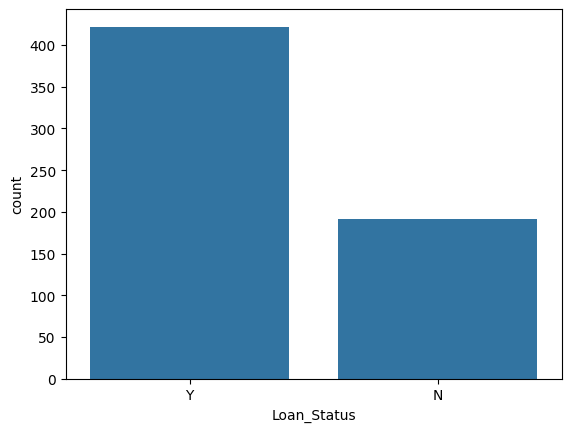

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status', data=train)
plt.show()


**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [ ]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


SMOTE and Testing

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(y_train.value_counts())
print(y_train_bal.value_counts())


Loan_Status
1    342
0    149
Name: count, dtype: int64
Loan_Status
0    342
1    342
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_val)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,          # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_tuned = best_model.predict(X_val)
accuracy_tuned = accuracy_score(y_val, y_pred_tuned)

print("Tuned Model Accuracy:", accuracy_tuned)

Tuned Model Accuracy: 0.7723577235772358


In [ ]:
from google.colab import files

train.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>